# Coffee Roast Deep Learning Model

In [24]:
# import tensorflow, numpy, matplotlib and pandas
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
# Generate coffee roast artificial data
# Credits: Advanced Algorithms, Stanford University & DeepLearning.AI
def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

In [35]:
#load and visualize data sample
X,y = load_coffee_data()

x_frame = pd.DataFrame(X)
x_frame.rename(columns = {0:'Temp(C)',1:'Time(min)'},inplace = True)
x_frame.sample(5)

,Temp(C),Time(min)
182,237.207317,14.228610
79,234.574224,14.271182
141,190.793580,15.281168
148,172.340408,11.985262
172,241.380696,12.018021


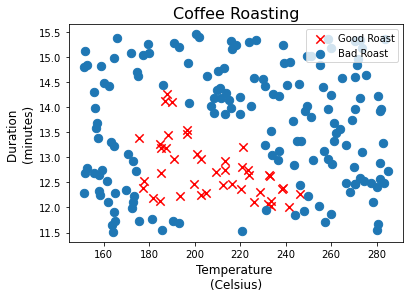

In [6]:
# plot: visualize data 
fig, ax = plt.subplots(1,1)
y = y.reshape(-1,)
ax.scatter(X[y==1,0],X[y==1,1], s=70, marker='x', c='red', label="Good Roast" )
ax.scatter(X[y==0,0],X[y==0,1], s=70, marker='o', label="Bad Roast" )
ax.set_title('Coffee Roasting',size=16)
ax.set_xlabel("Temperature \n(Celsius)",size=12)
ax.set_ylabel("Duration \n(minutes)",size=12)
ax.legend(loc='upper right')
plt.show()

In [41]:
# Feature scaling - mean normalization
# Accelerate back-propagation

print('Temperature min and max before normalization: ' ,np.max(X[:,0]), np.min(X[:,0]))
print('Duration min and max before normalization: ' ,np.max(X[:,1]), np.min(X[:,1]))

norm = tf.keras.layers.Normalization(axis=-1)
norm.adapt(X) #learns mean and variance
Xn = norm(X)

print('\nTemperature min and max after normalization: ' ,np.max(Xn[:,0]), np.min(Xn[:,0]))
print('Duration min and max after normalization: ' ,np.max(Xn[:,1]), np.min(Xn[:,1]))

Temperature min and max before normalization:  284.99434167453603 151.32372212128612
Duration min and max before normalization:  15.454206928801511 11.512747082472469

Temperature min and max after normalization:  1.6597537 -1.6852187
Duration min and max after normalization:  1.7932389 -1.6996713


In [42]:
# tile/copy data to increase training set size and reduce #epochs (cycles through the full dataset)
Xt = np.tile(Xn,(1000,1))
yt = np.tile(y,(1000,1))
print(Xt.shape, y.shape)

(200000, 2) (200, 1)


In [52]:
# tensorflow deep leanring model

tf.random.set_seed(1234) #applied to achieve consistent results
model = Sequential(
[
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(units=3, activation = 'sigmoid', name = 'layer1'),
    tf.keras.layers.Dense(units=1, activation = 'sigmoid', name = 'layer2')
])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [53]:
# check tensorflow weights and biases instantiated

w1, b1 = model.get_layer('layer1').get_weights()
w2, b2 = model.get_layer('layer2').get_weights()
print('W1:',w1,'\nb1:',b1)
print('W2:',w2,'\nb2:',b2)

W1: [[ 0.12549484  0.13572657  0.57449317]
 [-1.0806042   0.49414396 -0.15469414]] 
b1: [0. 0. 0.]
W2: [[-0.5714925 ]
 [ 0.35067773]
 [-0.05653918]] 
b2: [0.]


In [55]:
#Compile model
#The model.compile statement defines a loss function and specifies a compile optimization.
#The model.fit statement runs gradient descent and fits the weights to the data.

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01))

model.fit(Xt,yt,epochs=10)

Epoch 1/10
6250/6250 [==============================] - 7s 984us/step - loss: 0.2141
Epoch 2/10
6250/6250 [==============================] - 6s 1ms/step - loss: 0.1352
Epoch 3/10
6250/6250 [==============================] - 6s 1ms/step - loss: 0.1286
Epoch 4/10
6250/6250 [==============================] - 6s 956us/step - loss: 0.1196
Epoch 5/10
6250/6250 [==============================] - 6s 1ms/step - loss: 0.1113
Epoch 6/10
6250/6250 [==============================] - 6s 1ms/step - loss: 0.0461
Epoch 7/10
6250/6250 [==============================] - 6s 1ms/step - loss: 0.0143
Epoch 8/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0094
Epoch 9/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0066
Epoch 10/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0047


In [56]:
#updated model weights
w1, b1 = model.get_layer('layer1').get_weights()
w2, b2 = model.get_layer('layer2').get_weights()
print('W1:',w1,'\nb1:',b1)
print('W2:',w2,'\nb2:',b2)

W1: [[ 1.3572883e+01 -1.0321506e+01 -1.0692184e-03]
 [ 1.1269381e+01 -2.0232596e-01 -8.2848539e+00]] 
b1: [  1.3798373 -11.312136  -10.448573 ]
W2: [[-37.07618 ]
 [-39.243717]
 [-34.69771 ]] 
b2: [19.746706]


In [58]:
# test predictions
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = norm(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 [==============================] - 0s 74ms/step
predictions = 
 [[9.7527111e-01]
 [2.8858622e-08]]


In [61]:
# convert prediction probablity to a desicion (0.5 threshold)
yhat = []
for prediction in predictions:
    if prediction >= 0.5:
        yhat.append(1)
    else:
        yhat.append(0)

print(yhat)

[1, 0]
